### CAPSTONE PROJECT TASKS
#### In this project we will analyze prices and returns of cryptocurrency such as Bitcoin (BTC), Ethereum (ETH), Ripple (XRP) and others.
#### These are the main proposed tasks of the project:
#### 1. Import all the datasets using PANDAS.
#### 2. Using Matplotlib, plot lineplots that display crypto daily prices on one single figure.
#### 3. Using Matplotlib, plot crypto daily prices on multiple subplots.
#### 4. Using Matplotlib, plot a scatterplot for Bitcoin and Ethereum daily returns.
#### 5. Plot similar scatterplot with task 4, but this time using Seaborn.
#### 6. Assume you allocate 60% of your assets in XRP, and equally divide the rest in other cryptos. Using Matplotlib, generate a pie chart to show these allocations. Use "explode" function to seperate Ripple XRP for the other assets.
#### 7. Using Matplotlib, plot the Ethereum returns on a histogram, using 30 bins with red color.
#### 8. Using Seaborn, plot a heatmap that shows the correlations between crypto daily returns.

##

In [1]:
# Start by importing all the libraries we will need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

##

### Task 1 - Importing the datasets using PANDAS.

In [2]:
crypto_prices = pd.read_csv("crypto_daily_prices.csv")
crypto_returns = pd.read_csv("crypto_daily_returns.csv")

In [3]:
# Lets quickly explore the datasets a little bit
crypto_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2385 non-null   object 
 1   BTC-USD Price  2385 non-null   float64
 2   ETH-USD Price  2061 non-null   float64
 3   LTC-USD Price  2385 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


In [4]:
crypto_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2385 non-null   object 
 1   BTC     2385 non-null   float64
 2   ETH     2061 non-null   float64
 3   LTC     2385 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


In [5]:
crypto_prices.duplicated().sum()

0

In [6]:
crypto_returns.duplicated().sum()

0

In [7]:
# We see that there are no duplicates, but there seem to be some missing values in the Ethereum columns, in both datasets
crypto_prices.isnull().sum()

Date               0
BTC-USD Price      0
ETH-USD Price    324
LTC-USD Price      0
dtype: int64

In [8]:
crypto_returns.isnull().sum()

Date      0
BTC       0
ETH     324
LTC       0
dtype: int64

In [9]:
# Instead of deleting these rows, we could try filling these cells with the mean of the rest values of the column
# We can do this easily by calculating the column mean and using the fillna() function
eth_price_mean = crypto_prices["ETH-USD Price"].mean()
eth_return_mean = crypto_returns["ETH"].mean()

crypto_prices["ETH-USD Price"].fillna(value=eth_price_mean, inplace=True)
crypto_returns["ETH"].fillna(value=eth_return_mean, inplace=True)

# Checking out the result
print(crypto_prices.isnull().sum())
print()
print(crypto_returns.isnull().sum())

Date             0
BTC-USD Price    0
ETH-USD Price    0
LTC-USD Price    0
dtype: int64

Date    0
BTC     0
ETH     0
LTC     0
dtype: int64


In [10]:
crypto_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2385 non-null   object 
 1   BTC-USD Price  2385 non-null   float64
 2   ETH-USD Price  2385 non-null   float64
 3   LTC-USD Price  2385 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


### Now we can continue with the rest of the tasks.

##

### Task 2 - Using Matplotlib, plot lineplots that display crypto daily prices on one single figure.

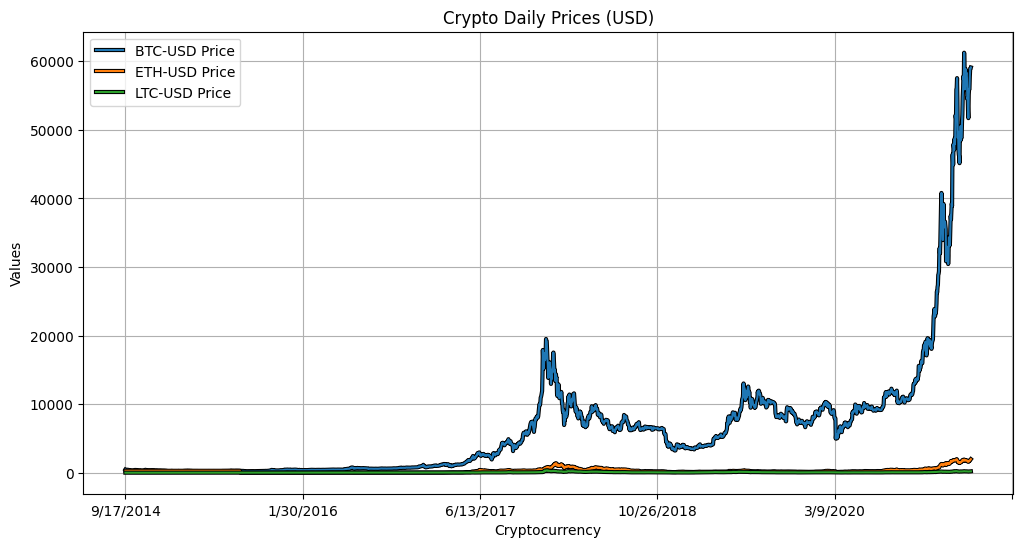

In [11]:
crypto_prices.plot(x = "Date", y = ["BTC-USD Price", "ETH-USD Price", "LTC-USD Price"], 
                   path_effects=[pe.withStroke(linewidth=3, foreground='black')], figsize=(12,6))
plt.title("Crypto Daily Prices (USD)")
plt.xlabel("Cryptocurrency")
plt.ylabel("Values")
plt.grid()
plt.show()

##

### Task 3 - Using Matplotlib, plot crypto daily prices on multiple subplots.

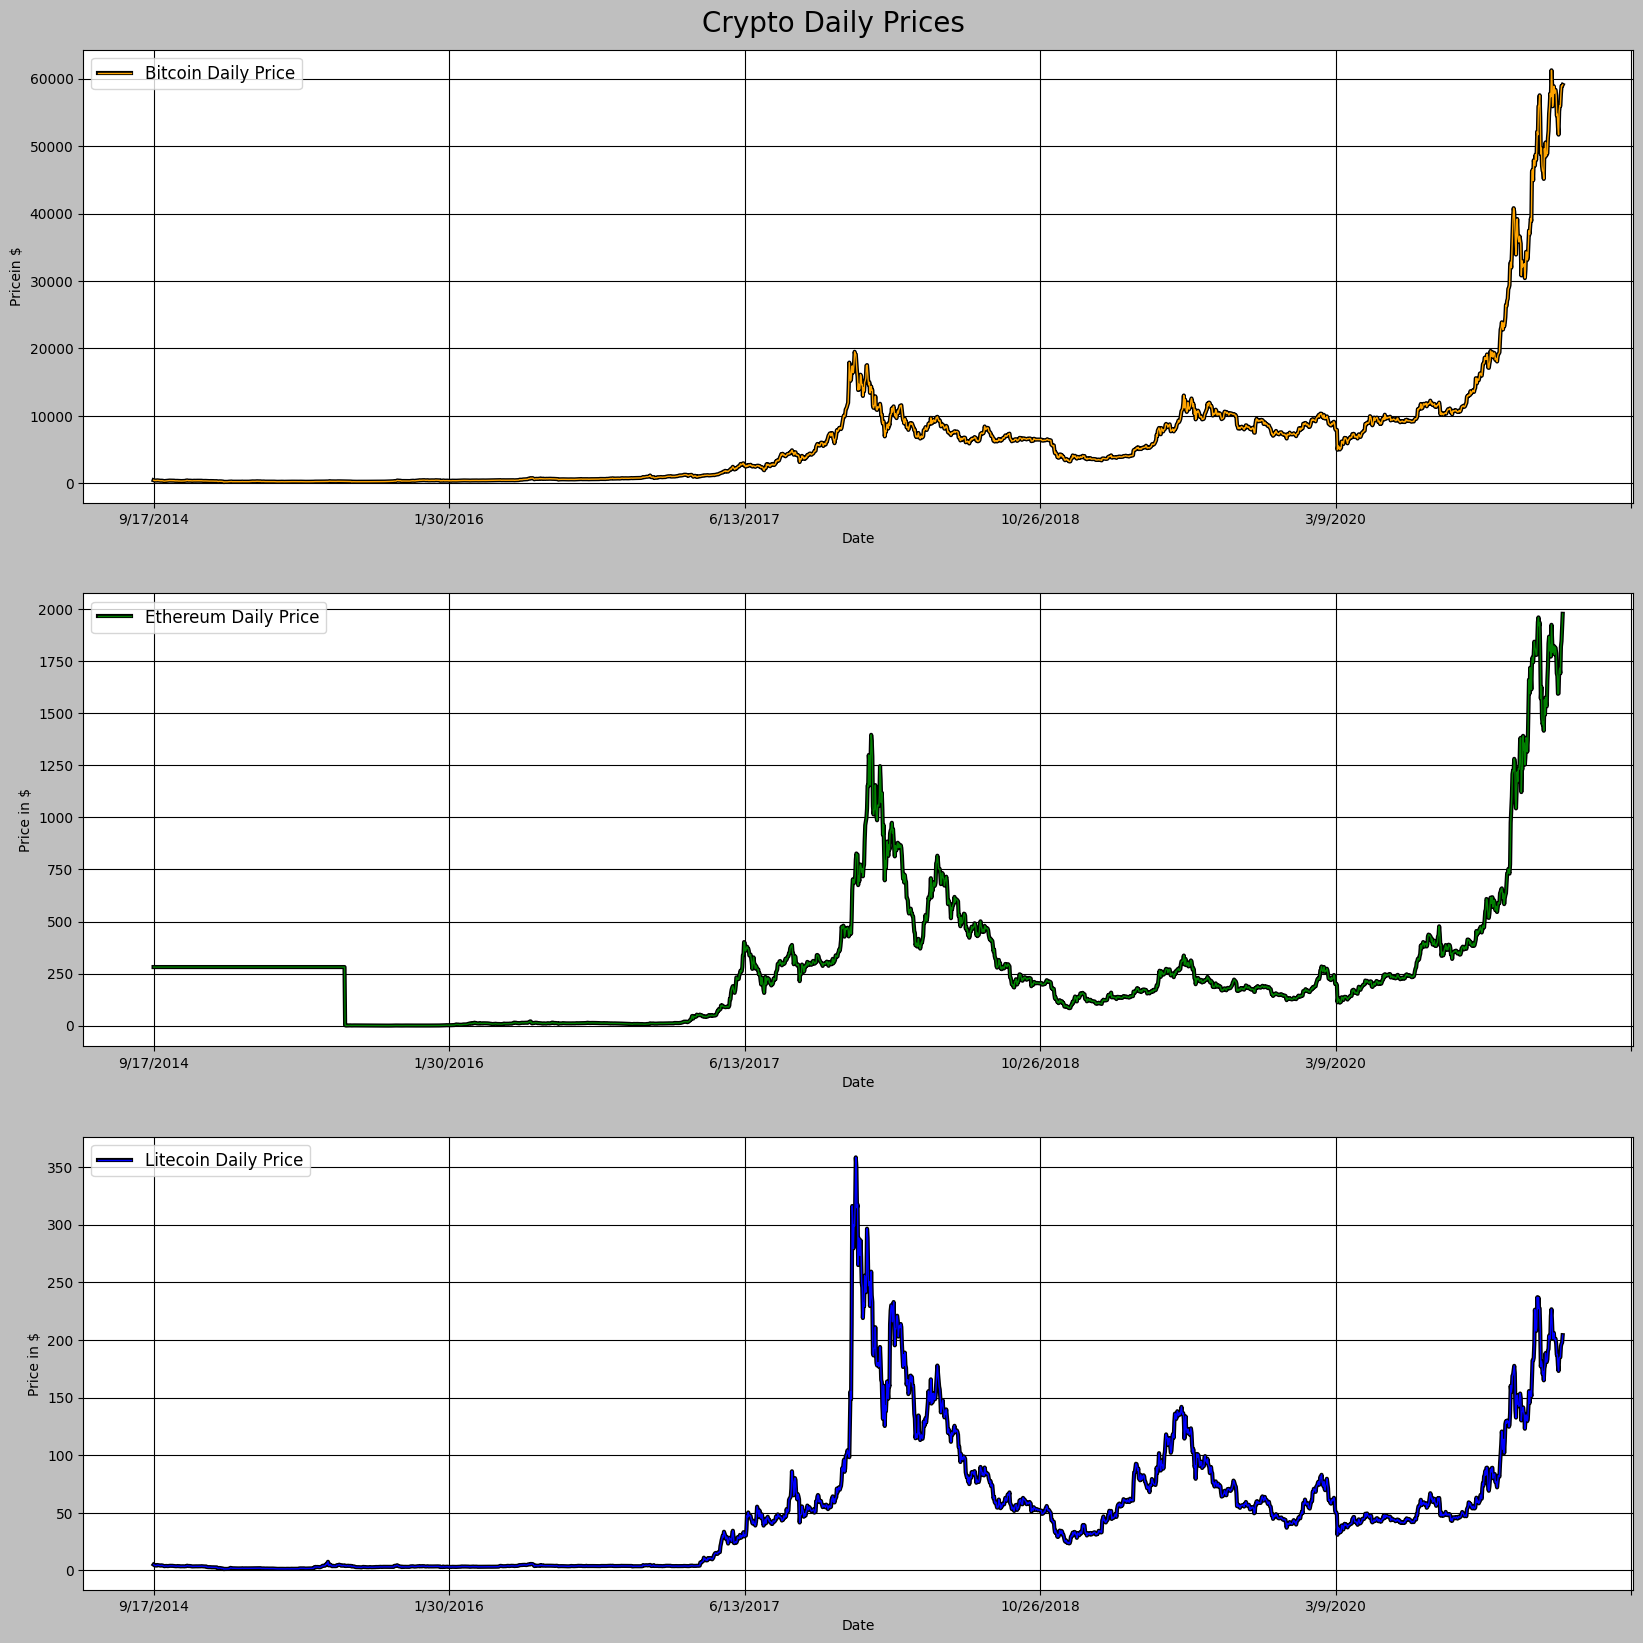

In [12]:
with plt.style.context("grayscale"):
    # This indicates that we have 3 row, 1 column, and sets the total figure size
    fig, ax = plt.subplots(3, 1, figsize=(20,20))           

    # This is for the first plot
    crypto_prices.plot(x = "Date", y = "BTC-USD Price", linewidth = 1, label = "Bitcoin Daily Price",
                  path_effects=[pe.withStroke(linewidth=3, foreground='black')], color="orange", ax=ax[0])
    ax[0].set(xlabel="Date", ylabel="Pricein $")
    ax[0].legend(loc = "upper left", prop={'size': 12})
    ax[0].grid(True)

    # This is for the second plot
    crypto_prices.plot(x = "Date", y = "ETH-USD Price", linewidth = 1, label = "Ethereum Daily Price",
                         path_effects=[pe.withStroke(linewidth=3, foreground='black')], color="green", ax=ax[1])
    ax[1].set(xlabel="Date", ylabel="Price in $")
    ax[1].legend(loc = "upper left", prop={'size': 12})
    ax[1].grid(True)
    
    # This is for the third plot
    crypto_prices.plot(x = "Date", y = "LTC-USD Price", linewidth = 1, label = "Litecoin Daily Price",
                         path_effects=[pe.withStroke(linewidth=3, foreground='black')], color="blue", ax=ax[2])
    ax[2].set(xlabel="Date", ylabel="Price in $")
    ax[2].legend(loc = "upper left", prop={'size': 12})
    ax[2].grid(True)

    fig.suptitle("Crypto Daily Prices", fontsize=20, y=0.90)
    plt.show()


##

### Task 4 - Using Matplotlib, plot a scatterplot for Bitcoin and Ethereum daily returns.

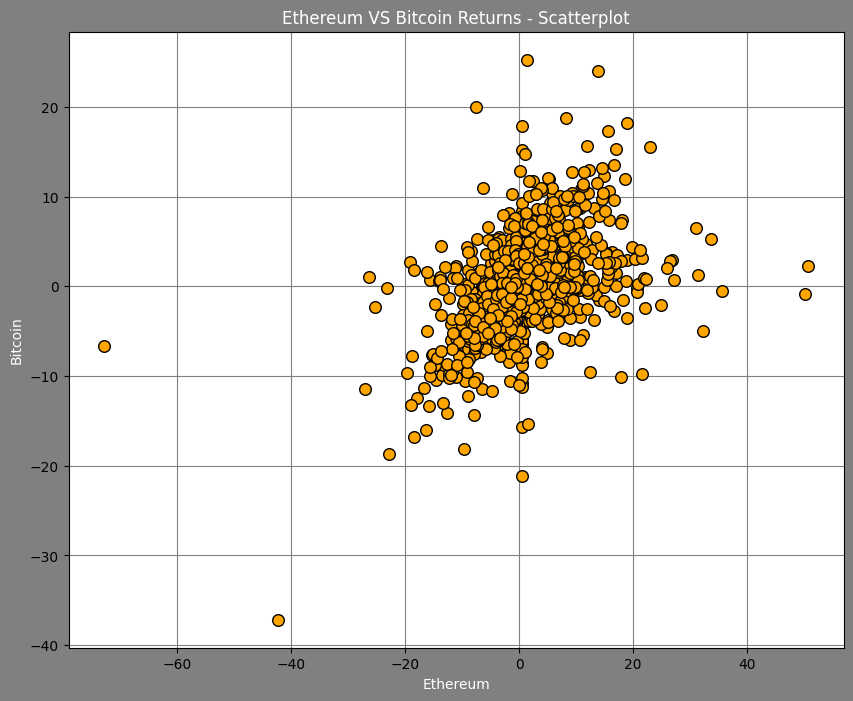

In [13]:
plt.figure(figsize=(10,8), facecolor="grey")
plt.scatter(x = "ETH", y = "BTC", data = crypto_returns, edgecolor="black", color="orange", s=70, zorder=2)
plt.xlabel("Ethereum", color="white")
plt.ylabel("Bitcoin", color="white")
plt.title("Ethereum VS Bitcoin Returns - Scatterplot", color="white")
plt.grid(color="grey", zorder=1)
plt.show()

##

### Task 5 - Plot similar scatterplot with task 4, but this time using Seaborn.

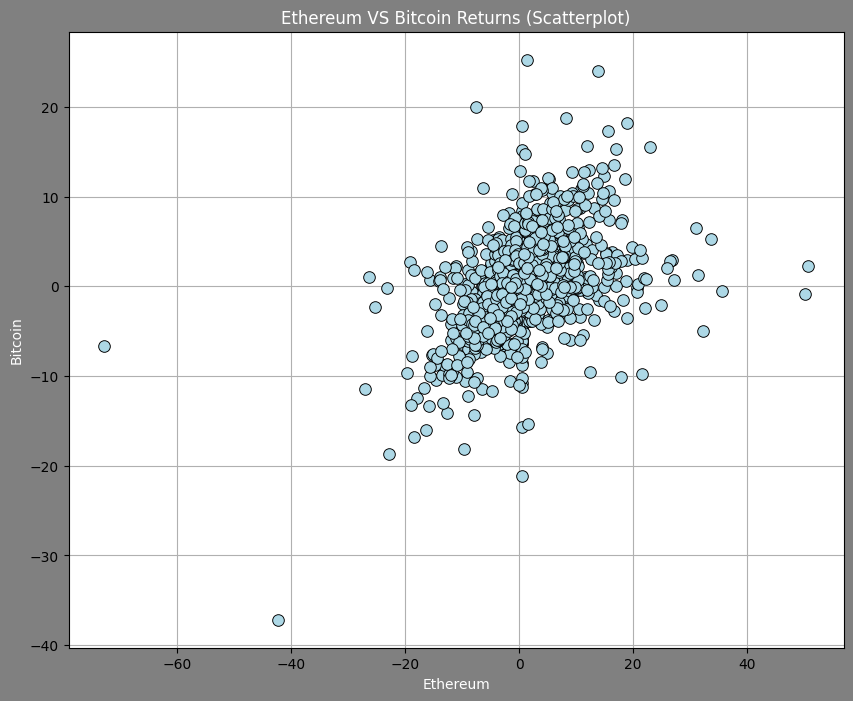

In [14]:
plt.figure(figsize=(10,8), facecolor="grey")
ax = sns.scatterplot(x = "ETH", y = "BTC", data = crypto_returns, color="lightblue", s=70, edgecolor="black")
ax.set_xlabel("Ethereum", color="white")
ax.set_ylabel("Bitcoin", color="white")
ax.set_title("Ethereum VS Bitcoin Returns (Scatterplot)", color="white")
ax.set_axisbelow(True)
ax.grid()

##

### Task 6 - Assume you allocate 60% of your assets in XRP, and equally divide the rest in other cryptos. Using Matplotlib, generate a pie chart to show these allocations. Use "explode" function to seperate Ripple XRP for the other assets.

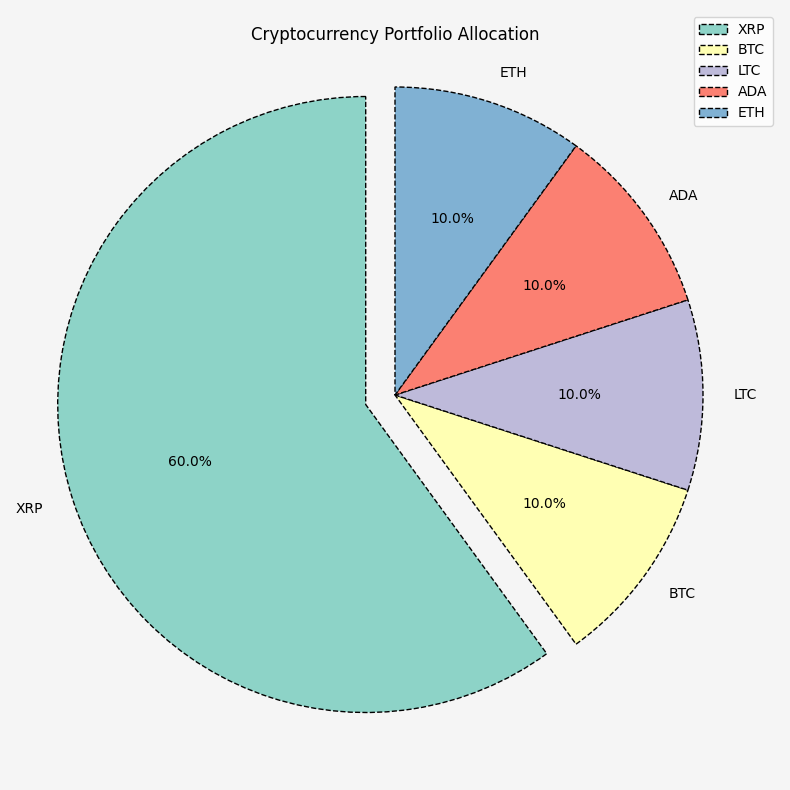

In [15]:
values = [60, 10, 10, 10, 10]
labels = ["XRP", "BTC", "LTC", "ADA", "ETH"]
palette = sns.set_palette("Set3")
explode = [0.1, 0, 0, 0, 0]

plt.figure(figsize=(10,10), facecolor="whitesmoke")
plt.pie(values, labels=labels, colors=palette, explode=explode, autopct='%1.1f%%',
        startangle=90, wedgeprops={"edgecolor":"black", "linewidth":1, "linestyle":"--", "antialiased":True})
plt.title("Cryptocurrency Portfolio Allocation", y=0.95)
plt.legend()
plt.show()

##

### Task 7 - Using Matplotlib, plot the Ethereum returns on a histogram, using 30 bins with red color.

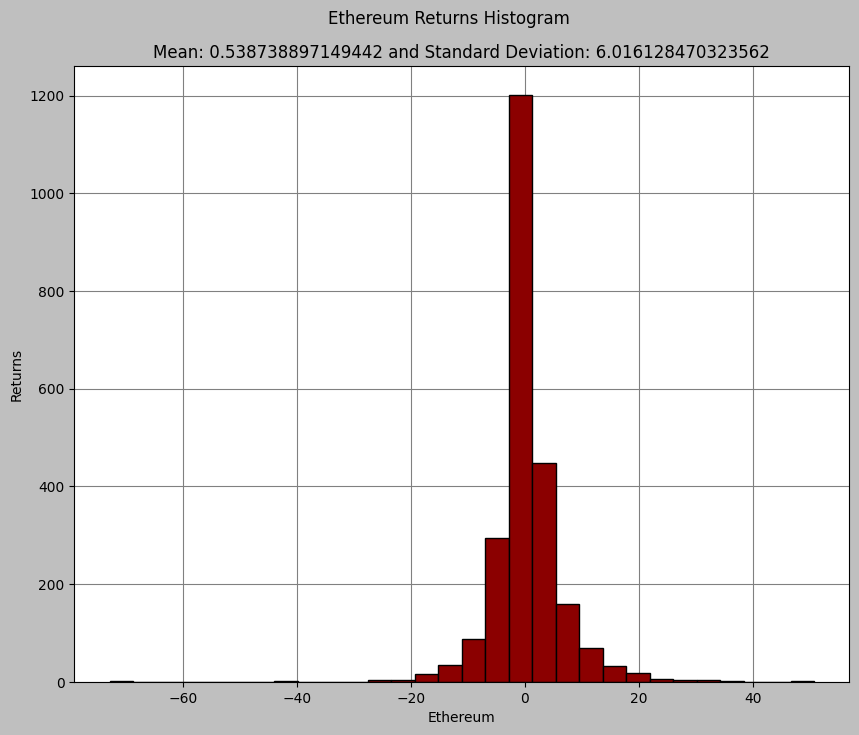

In [16]:
mean = crypto_returns["ETH"].mean()
sigma = crypto_returns["ETH"].std()

with plt.style.context("grayscale"):
    plt.figure(figsize=(10,8))
    plt.hist(crypto_returns["ETH"], bins=30, color="darkred", edgecolor="black", linewidth=1, zorder=2)
    plt.suptitle("Ethereum Returns Histogram", y=0.95)
    plt.title("Mean: " + str(mean) + " and Standard Deviation: " + str(sigma))
    plt.xlabel("Ethereum")
    plt.ylabel("Returns")
    plt.grid(color="grey", zorder=1)
    plt.show()

##

### Task 8 - Using Seaborn, plot a heatmap that shows the correlations between crypto daily returns.

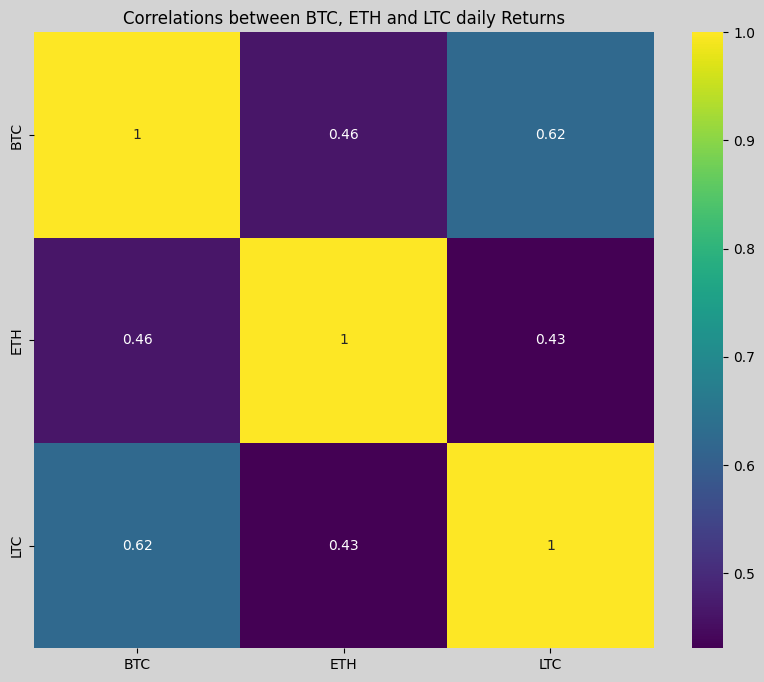

In [17]:
plt.figure(figsize=(10,8), facecolor="lightgrey")
ax = sns.heatmap(crypto_returns.corr(numeric_only=True), annot=True, cmap="viridis")
ax.set_title("Correlations between BTC, ETH and LTC daily Returns")
plt.show()
